## 数据导入

In [1]:

import pandas as pd
import numpy as np
import math as math
import numpy as np
from numpy import *
from scipy import stats
from scipy.stats import bartlett
from factor_analyzer import *
import numpy.linalg as nlg
from sklearn.cluster import KMeans
from matplotlib import cm
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns
from IPython.display import Image
import pydotplus 
import matplotlib.pyplot as plt
sns.set()
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
plt.rcParams['font.sans-serif'] = ['simhei']
plt.rcParams['font.serif'] = ['simhei']
sns.set_style("darkgrid",{"font.sans-serif":['simhei','Droid Sans Fallback']})
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import MultiComparison
#import initial packages

In [5]:
data=pd.read_excel("../resources/data.xlsx")
data.ddsex.astype("category")
data.ddmajor.astype("category")
data.ddgrade.astype("category")
data.ddprov.astype("category")
data.ddincome.astype("category")
data.dddist.astype("category")
#import data

0      2
1      2
2      2
3      2
4      1
      ..
119    1
120    3
121    3
122    1
123    1
Name: dddist, Length: 124, dtype: category
Categories (3, int64): [1, 2, 3]

## 描述性统计

2    80
1    44
Name: ddsex, dtype: int64
3    35
4    31
1    29
5    14
7     5
8     5
2     3
6     2
Name: ddmajor, dtype: int64
1     15
3      9
8      8
9      7
22     7
10     6
20     6
19     6
17     5
24     5
6      5
23     5
13     5
18     5
31     4
11     4
7      3
4      3
26     3
2      2
15     2
14     2
21     2
27     2
28     1
30     1
16     1
Name: ddprov, dtype: int64
2    72
3    25
1    10
4     7
6     6
5     4
Name: ddincome, dtype: int64
1    59
3    36
2    29
Name: dddist, dtype: int64
3    42
2    36
4    24
1    22
Name: ddgrade, dtype: int64


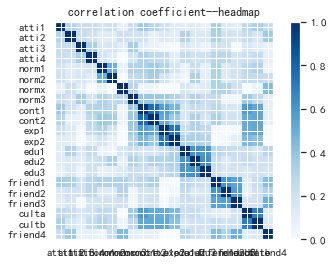

In [3]:
des=data.describe()
des.to_excel("描述性统计表格.xlsx")
print(data["ddsex"].value_counts())
print(data["ddmajor"].value_counts())
print(data["ddprov"].value_counts())
print(data["ddincome"].value_counts())
print(data["dddist"].value_counts())
print(data["ddgrade"].value_counts())
del des
def corr(data):
    return np.corrcoef(data)
test1=data
df2=test1.drop(columns=["id","ddsex","ddgrade","ddmajor","ddprov","ddincome","dddist","will"])
df2_corr=df2.corr()
cmap = cm.Blues
fig=plt.figure()
ax=fig.add_subplot(111)
map = ax.imshow(df2_corr, interpolation='nearest', cmap=cmap, vmin=0, vmax=1)
plt.title('correlation coefficient--headmap')
ax.set_yticks(range(len(df2_corr.columns)))
ax.set_yticklabels(df2_corr.columns)
ax.set_xticks(range(len(df2_corr)))
ax.set_xticklabels(df2_corr.columns)
plt.colorbar(map)
plt.show()
#go through a quick descriptive analysis

### 描述性统计——人口要素和因变量绘图

C:\ProgramData\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


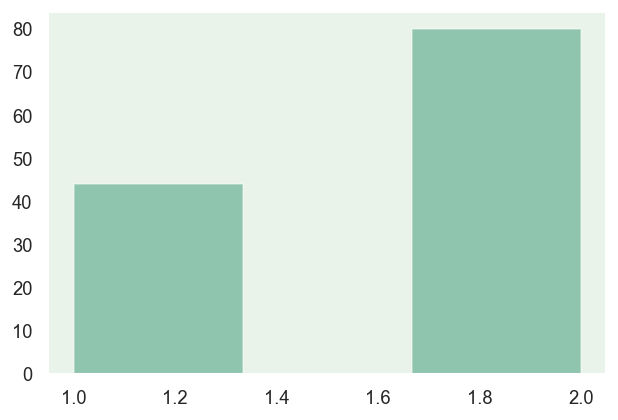

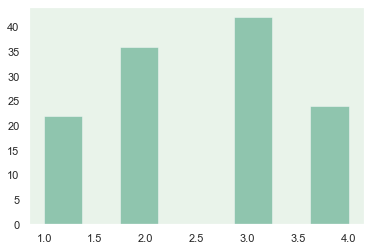

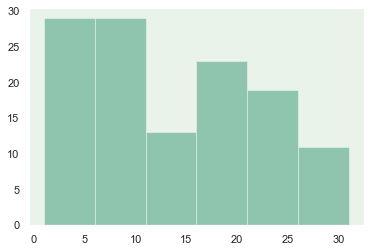

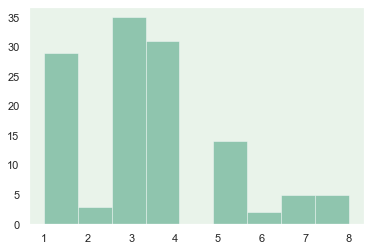

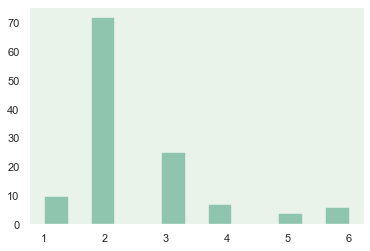

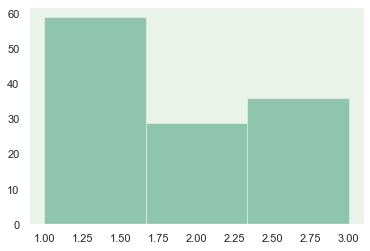

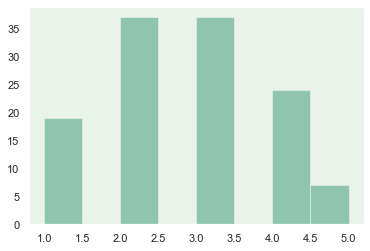

In [4]:
plt.figure(dpi=120)
sns.set(style='dark')
sns.set_style("dark", {"axes.facecolor": "#e9f3ea"})
g=sns.distplot(data.ddsex.tolist(),hist=True,
               kde=False,
               color="#098154")
plt.show()
s=sns.distplot(data.ddgrade.tolist(),
               hist=True,
               kde=False,
               color="#098154")
plt.show()
f=sns.distplot(data.ddprov.tolist(),
               hist=True,#默认绘制直方图，详细参考plt.hist
               kde=False,
               color="#098154")#修改柱子颜色
plt.show()
e=sns.distplot(data.ddmajor.tolist(),
               hist=True,#默认绘制直方图，详细参考plt.hist
               kde=False,
               color="#098154")#修改柱子颜色
plt.show()
er=sns.distplot(data.ddincome.tolist(),
               hist=True,#默认绘制直方图，详细参考plt.hist
               kde=False,
               color="#098154")#修改柱子颜色
plt.show()
gfr=sns.distplot(data.dddist.tolist(),
               hist=True,#默认绘制直方图，详细参考plt.hist
               kde=False,
               color="#098154")#修改柱子颜色
plt.show()
gfr=sns.distplot(data.will.tolist(),
               hist=True,#默认绘制直方图，详细参考plt.hist
               kde=False,
               color="#098154")#修改柱子颜色
plt.show()

## 信度和效度检验（为因子分析做准备）

In [5]:
# use Cronbach's Alpha to measure the reliability
test1=data
test=test1.drop(columns=["id","ddsex","ddgrade","ddmajor","ddprov","ddincome","dddist","friend1","friend2","friend3","friend4","normx","will"])
total_row = test.sum(axis=1)
sy = total_row.var()
var_column =  test.var()
si = var_column.sum()
r = (16.0/15.0)*(1-si/sy)
print ("影响因素类问题总信度系数为：",r,"，高于0.8，信度极好")
test2=data
test=test2[["friend1","friend2","friend3","friend4","normx"]]
total_row = test.sum(axis=1)
sy = total_row.var()
var_column =  test.var()
si = var_column.sum()
r = (5.0/4.0)*(1-si/sy)
print ("影响效力类问题总信度系数为：",r,"，高于0.7，探索研究可用")
del test1
del test2

影响因素类问题总信度系数为： 0.8552538558015412 ，高于0.8，信度极好
影响效力类问题总信度系数为： 0.7686619046320786 ，高于0.7，探索研究可用


In [6]:
# 问卷效度检验
def kmo(dataset_corr):
    corr_inv = np.linalg.inv(dataset_corr)
    nrow_inv_corr, ncol_inv_corr = dataset_corr.shape
    A = np.ones((nrow_inv_corr, ncol_inv_corr))
    for i in range(0, nrow_inv_corr, 1):
        for j in range(i, ncol_inv_corr, 1):
            A[i, j] = -(corr_inv[i, j]) / (math.sqrt(corr_inv[i, i] * corr_inv[j, j]))
            A[j, i] = A[i, j]
    dataset_corr = np.asarray(dataset_corr)
    kmo_num = np.sum(np.square(dataset_corr)) - np.sum(np.square(np.diagonal(A)))
    kmo_denom = kmo_num + np.sum(np.square(A)) - np.sum(np.square(np.diagonal(A)))
    kmo_value = kmo_num / kmo_denom
    return kmo_value

print("\nKMO结果:", kmo(df2_corr),"，可见大于0.7接近0.8，问卷效度介于一般到好之间")
df2_corr1 = df2_corr.values

bartlettresult=bartlett(df2_corr1[0], df2_corr1[1], df2_corr1[2], df2_corr1[3], df2_corr1[4],df2_corr1[5], df2_corr1[6], df2_corr1[7], df2_corr1[8], df2_corr1[9],df2_corr1[10], df2_corr1[11], df2_corr1[12], df2_corr1[13], df2_corr1[14],df2_corr1[15],df2_corr1[16],df2_corr1[17],df2_corr1[18],df2_corr1[19],df2_corr1[20])
print("\nBartlett结果:", bartlettresult,"，巴特利球形检验的值接近1，又由于KMO结果较好，所以可以使用因子分析。")


KMO结果: 0.7771440837603534 ，可见大于0.7接近0.8，问卷效度介于一般到好之间

Bartlett结果: BartlettResult(statistic=8.944139700844362, pvalue=0.9835452688181787) ，巴特利球形检验的值接近1，又由于KMO结果较好，所以可以使用因子分析。


## 人口学要素相关的ANOVA分析

In [6]:
def my_oneWayAnova(df,cata_name,num_name,alpha_anova=0.05,alpha_tukey=0.05):
    
    df[cata_name]=df[cata_name].astype('str')
    
    s1=df[cata_name]
    s2=df[num_name]
    
    fml=num_name+'~C('+cata_name+')'
    
    model = ols(fml,data=df).fit()
    anova_table_1 = anova_lm(model, typ = 2).reset_index()
    p1=anova_table_1.loc[0,'PR(>F)']
    
    #输出 ： 是否相等【不等式序列】
    if p1>alpha_anova:
        print('组间【无】显著差异')
    else:
        print('组间【有】显著差异')
        #输出不等式
        

    # 输出： 统计结果表（均值，分位数，差异组）
    df_p1=df.groupby([cata_name])[num_name].describe()

    # 输出： Tudey 多重比较
    mc = MultiComparison(df[num_name],df[cata_name])
    df_smry = mc.tukeyhsd(alpha=alpha_tukey).summary()
    m = np.array(df_smry.data)
    df_p2 =pd.DataFrame(m[1:],columns=m[0])
    
    #输出 ：分类直接的大小差异显著性
    df_p1_sub=df_p1[['mean']].copy()
    df_p1_sub.sort_values(by='mean',inplace=True)

    output_list=[]
    
    for x in range(1,len(df_p1_sub.index)):
        if (df_p2.loc[((df_p2.group1==df_p1_sub.index[x-1])&(df_p2.group2==df_p1_sub.index[x]))|
                      ((df_p2.group1==df_p1_sub.index[x])&(df_p2.group2==df_p1_sub.index[x-1])),
                      'reject'].iloc[0])=="True":
            smb='<'
        else:
            smb='<='
        if x==1:
            output_list.append(df_p1_sub.index[x-1])
            output_list.append(smb)
            output_list.append(df_p1_sub.index[x])
        else:
            output_list.append(smb)
            output_list.append(df_p1_sub.index[x])
    out_sentence=' '.join(output_list)
    print(out_sentence)
    
    
    # 输出： 箱线图
    #分布可视化boxplot
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=cata_name, y=num_name,data=df)#,order=df_p1_sub.index

    return df_p1,df_p2

组间【无】显著差异
2 <= 1


(       count      mean       std  min  25%  50%  75%  max
 ddsex                                                    
 1       44.0  2.704545  1.111871  1.0  2.0  3.0  3.0  5.0
 2       80.0  2.700000  1.129579  1.0  2.0  3.0  4.0  5.0,
   group1 group2 meandiff p-adj    lower   upper reject
 0      1      2  -0.0045   0.9  -0.4219  0.4128  False)

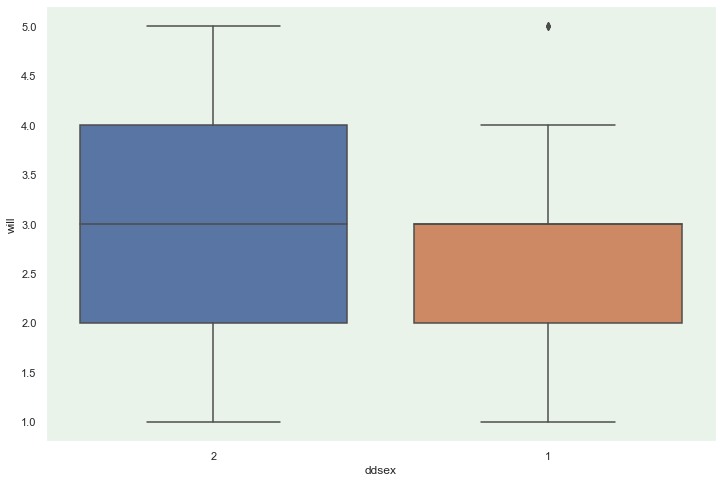

In [7]:
# 性别对意愿的影响
my_oneWayAnova(data,"ddsex","will")


组间【无】显著差异
3 <= 4 <= 1 <= 2


(         count      mean       std  min  25%  50%  75%  max
 ddgrade                                                    
 1         22.0  2.727273  0.984732  1.0  2.0  3.0  3.0  5.0
 2         36.0  2.750000  1.105183  1.0  2.0  3.0  4.0  5.0
 3         42.0  2.666667  1.161720  1.0  2.0  3.0  3.0  5.0
 4         24.0  2.666667  1.239448  1.0  2.0  2.0  4.0  5.0,
   group1 group2 meandiff p-adj    lower   upper reject
 0      1      2   0.0227   0.9  -0.7755  0.8209  False
 1      1      3  -0.0606   0.9  -0.8369  0.7157  False
 2      1      4  -0.0606   0.9  -0.9312    0.81  False
 3      2      3  -0.0833   0.9  -0.7533  0.5866  False
 4      2      4  -0.0833   0.9  -0.8606   0.694  False
 5      3      4      0.0   0.9  -0.7548  0.7548  False)

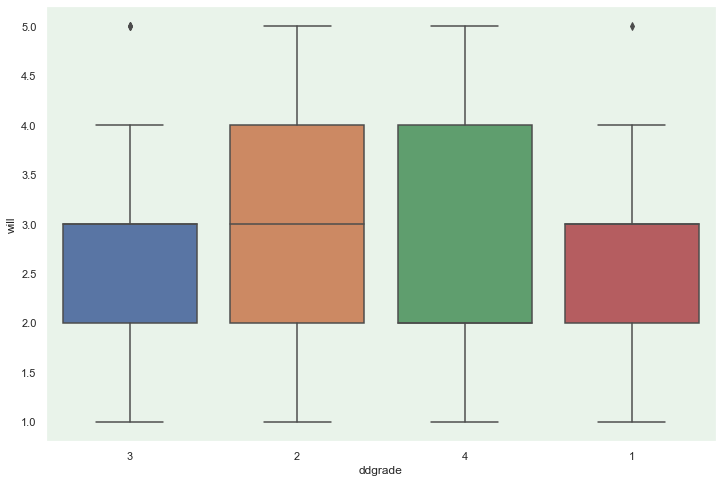

In [8]:
# 年级对意愿影响
my_oneWayAnova(data,"ddgrade","will")

组间【有】显著差异
7 <= 4 <= 1 <= 3 <= 2 <= 8 <= 6 <= 5


(         count      mean       std  min   25%  50%   75%  max
 ddmajor                                                      
 1         29.0  2.620690  1.049278  1.0  2.00  3.0  3.00  4.0
 2          3.0  3.000000  1.732051  1.0  2.50  4.0  4.00  4.0
 3         35.0  2.628571  1.002518  1.0  2.00  3.0  3.00  5.0
 4         31.0  2.354839  1.050346  1.0  2.00  2.0  3.00  4.0
 5         14.0  3.642857  1.081818  2.0  3.00  3.5  4.75  5.0
 6          2.0  3.500000  2.121320  2.0  2.75  3.5  4.25  5.0
 7          5.0  2.200000  0.836660  1.0  2.00  2.0  3.00  3.0
 8          5.0  3.200000  1.303840  2.0  2.00  3.0  4.00  5.0,
    group1 group2 meandiff   p-adj    lower   upper reject
 0       1      2   0.3793     0.9  -1.6284   2.387  False
 1       1      3   0.0079     0.9  -0.8234  0.8392  False
 2       1      4  -0.2659     0.9  -1.1211  0.5894  False
 3       1      5   1.0222  0.0764  -0.0552  2.0995  False
 4       1      6   0.8793     0.9  -1.5409  3.2995  False
 5       1     

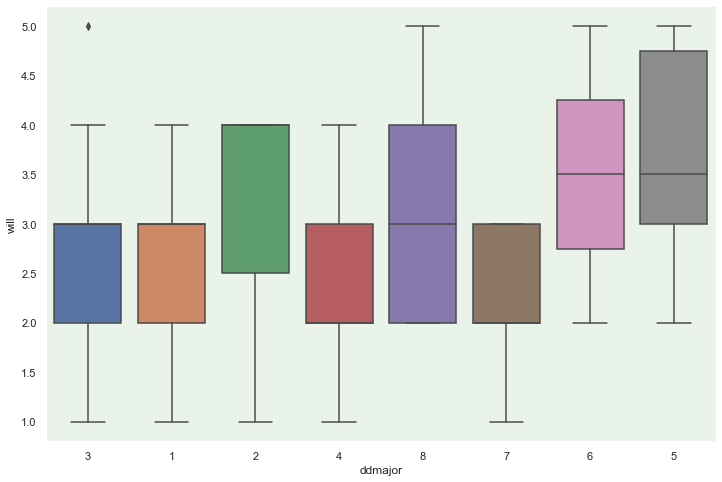

In [9]:
# 专业对意愿影响
my_oneWayAnova(data,"ddmajor","will")

组间【无】显著差异
4 <= 3 <= 2 <= 6 <= 5 <= 1


(          count      mean       std  min   25%  50%   75%  max
 ddincome                                                      
 1          10.0  3.500000  0.849837  2.0  3.00  3.5  4.00  5.0
 2          72.0  2.638889  1.038764  1.0  2.00  3.0  3.00  5.0
 3          25.0  2.600000  1.154701  1.0  2.00  3.0  3.00  5.0
 4           7.0  2.142857  1.214986  1.0  1.00  2.0  3.00  4.0
 5           4.0  3.250000  1.258306  2.0  2.75  3.0  3.50  5.0
 6           6.0  2.833333  1.722401  1.0  2.00  2.0  4.25  5.0,
    group1 group2 meandiff   p-adj    lower   upper reject
 0       1      2  -0.8611  0.1969  -1.9395  0.2173  False
 1       1      3     -0.9  0.2545  -2.0956  0.2956  False
 2       1      4  -1.3571  0.1331  -2.9318  0.2176  False
 3       1      5    -0.25     0.9  -2.1404  1.6404  False
 4       1      6  -0.6667  0.8317  -2.3168  0.9834  False
 5       2      3  -0.0389     0.9  -0.7807  0.7029  False
 6       2      4   -0.496  0.8514  -1.7611  0.7691  False
 7       2     

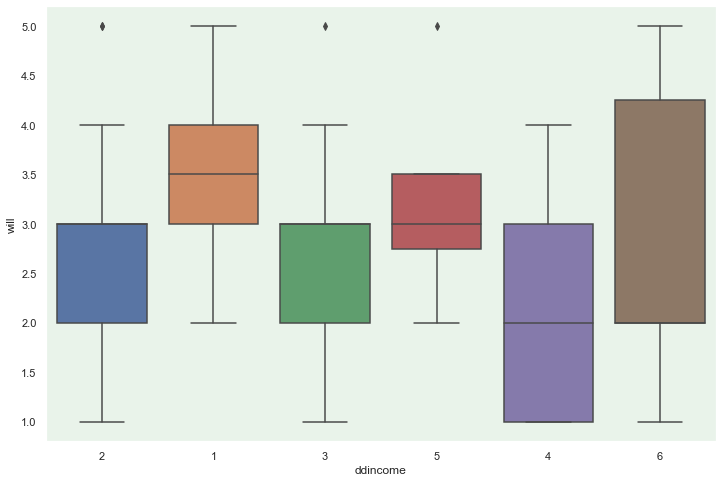

In [10]:
# 消费水平对意愿影响
my_oneWayAnova(data,"ddincome","will")

组间【无】显著差异
4 <= 13 <= 14 <= 3 <= 26 <= 10 <= 22 <= 31 <= 20 <= 9 <= 23 <= 19 <= 24 <= 17 <= 6 <= 1 <= 18 <= 21 <= 27 <= 16 <= 7 <= 8 <= 11 <= 15 <= 2 <= 30 <= 28


(        count      mean       std  min   25%  50%   75%  max
 ddprov                                                      
 1        15.0  3.000000  1.253566  1.0  2.00  3.0  4.00  5.0
 10        6.0  2.166667  1.471960  1.0  1.00  1.5  3.50  4.0
 11        4.0  3.250000  1.500000  2.0  2.00  3.0  4.25  5.0
 13        5.0  2.000000  1.000000  1.0  1.00  2.0  3.00  3.0
 14        2.0  2.000000  1.414214  1.0  1.50  2.0  2.50  3.0
 15        2.0  3.500000  0.707107  3.0  3.25  3.5  3.75  4.0
 16        1.0  3.000000       NaN  3.0  3.00  3.0  3.00  3.0
 17        5.0  2.800000  0.447214  2.0  3.00  3.0  3.00  3.0
 18        5.0  3.000000  1.224745  1.0  3.00  3.0  4.00  4.0
 19        6.0  2.666667  0.816497  2.0  2.00  2.5  3.00  4.0
 2         2.0  4.500000  0.707107  4.0  4.25  4.5  4.75  5.0
 20        6.0  2.500000  0.836660  2.0  2.00  2.0  2.75  4.0
 21        2.0  3.000000  0.000000  3.0  3.00  3.0  3.00  3.0
 22        7.0  2.285714  1.112697  1.0  1.50  2.0  3.00  4.0
 23     

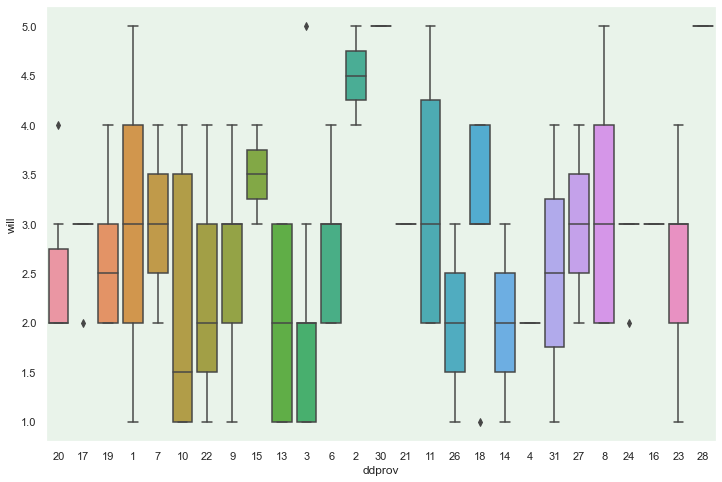

In [11]:
# 省份对意愿影响
my_oneWayAnova(data,"ddprov","will")

组间【无】显著差异
2 <= 3 <= 1


(        count      mean       std  min  25%  50%  75%  max
 dddist                                                    
 1        59.0  2.728814  1.229389  1.0  2.0  3.0  4.0  5.0
 2        29.0  2.620690  0.862463  1.0  2.0  3.0  3.0  4.0
 3        36.0  2.722222  1.136690  1.0  2.0  3.0  3.0  5.0,
   group1 group2 meandiff p-adj    lower   upper reject
 0      1      2  -0.1081   0.9  -0.7147  0.4985  False
 1      1      3  -0.0066   0.9  -0.5723  0.5591  False
 2      2      3   0.1015   0.9  -0.5659  0.7689  False)

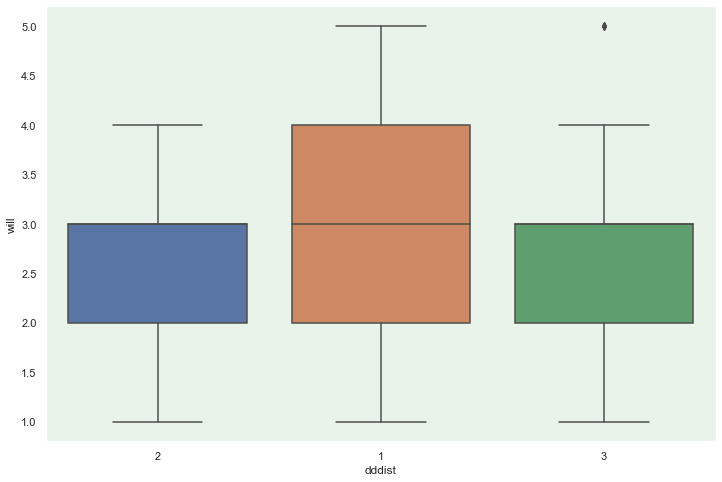

In [12]:
# 地区对意愿影响
my_oneWayAnova(data,"dddist","will")

## 探索性因子分析——PCA主成分分析A：选取前十二个主成分保证贡献率超过85%

In [17]:
# 求矩阵R的全部特征值，构成向量
eig_value, eigvector = nlg.eig(df2_corr)  
eig = pd.DataFrame()
eig['names'] = df2_corr.columns
eig['eig_value'] = eig_value
eig.sort_values('eig_value', ascending=False, inplace=True)
print("\n特征值\n：",eig)

# 求特征向量
eig1=pd.DataFrame(eigvector)
eig1.columns = df2_corr.columns
eig1.index = df2_corr.columns
print("\n特征向量\n",eig1)

# 求公因子个数
for m in range(1, 21):
    if eig['eig_value'][:m].sum() / eig['eig_value'].sum() >= 0.85:
        print("\n公因子个数:", m)
        break
# 求因子载荷阵
A = np.mat(np.zeros((21, 12)))
i = 0
j = 0
while i < 12:
    j = 0
    while j < 21:
        A[j:, i] = sqrt(eig_value[i]) * eigvector[j, i]
        j = j + 1
    i = i + 1
a = pd.DataFrame(A)
a.columns = ['factor1', 'factor2', 'factor3', 'factor4', 'factor5','factor6', 'factor7', 'factor8', 'factor9', 'factor10','factor11', 'factor12']
a.index = df2_corr.columns
PCAtransfer=pd.DataFrame(a)
PCAtransfer.to_excel("因子载荷阵.xlsx")
fa = FactorAnalyzer(n_factors=12)
fa.loadings_ = a

print("\n特殊因子方差:\n", fa.get_communalities())  # 特殊因子方差，因子的方差贡献度 ，反映公共因子对变量的贡献
PCAtransfer=pd.DataFrame(fa.get_communalities())
PCAtransfer.to_excel("特殊因子方差.xlsx")

var = fa.get_factor_variance()  # 给出贡献率
print("\n解释的总方差（即贡献率）:\n", var)
PCAtransfer=pd.DataFrame(var)
PCAtransfer.to_excel("贡献率.xlsx")

rotator = Rotator()
b = pd.DataFrame(rotator.fit_transform(fa.loadings_))
b.columns = ['factor1', 'factor2', 'factor3', 'factor4', 'factor5','factor6', 'factor7', 'factor8', 'factor9', 'factor10','factor11', 'factor12']
b.index = df2_corr.columns
print("\n因子旋转:\n", b)
PCAtransfer=pd.DataFrame(b)
PCAtransfer.to_excel("因子旋转.xlsx")

X1 = np.mat(df2_corr)
X1 = nlg.inv(X1)
b = np.mat(b)
factor_score = np.dot(X1, b)
factor_score = pd.DataFrame(factor_score)
factor_score.columns = ['factor1', 'factor2', 'factor3', 'factor4', 'factor5','factor6', 'factor7', 'factor8', 'factor9', 'factor10','factor11', 'factor12']
factor_score.index = df2_corr.columns
print("\n因子得分：\n", factor_score)
PCAtransfer=pd.DataFrame(factor_score)
PCAtransfer.to_excel("因子得分.xlsx")

fa_t_score = np.dot(np.mat(df2), np.mat(factor_score))
print("\n各个个案的因子得分：\n",pd.DataFrame(fa_t_score))
PCAresult=pd.DataFrame(fa_t_score)
PCAresult.to_excel("PCA结果.xlsx")
print("通过主成分分析，我们抽取了12个特征变量，并将其结果输出到了PCA结果.xlsx中。")


特征值
：       names  eig_value
0     atti1   5.770741
1     atti2   2.725461
2     atti3   1.822353
3     atti4   1.395221
4     norm1   1.235081
5     norm2   1.150280
6     normx   0.948898
7     norm3   0.757318
8     cont1   0.724469
9     cont2   0.595977
10     exp1   0.582680
11     exp2   0.552768
18    culta   0.459418
19    cultb   0.418887
20  friend4   0.400528
17  friend3   0.359375
16  friend2   0.300195
15  friend1   0.250975
14     edu3   0.217934
12     edu1   0.169757
13     edu2   0.161683

特征向量
             atti1     atti2     atti3     atti4     norm1     norm2     normx  \
atti1   -0.199306  0.039815  0.230728 -0.180953 -0.226802 -0.037250  0.294925   
atti2   -0.170814  0.181052  0.013823 -0.217609 -0.355527 -0.133098  0.433809   
atti3   -0.118928  0.123361  0.172664 -0.604175 -0.038243  0.145951 -0.123416   
atti4   -0.190789  0.048980  0.043389 -0.241340 -0.107474  0.553734 -0.121596   
norm1   -0.209527 -0.048447  0.222722 -0.025628  0.473067 -0.081916  0.0487

## 通过PCA——A得到的主成分进行OLS回归

In [18]:
## PCA后续，简单OLS估计
PCAresult['will']=data.will.to_list()
PCAresult.columns=["A","B","C","D","E","F","G","H","I","J","K","L","will"]
result = sm.ols(formula="will ~ A+B+C+D+E+F+G+H+I+J+K+L", data=PCAresult).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   will   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     3.755
Date:                Sun, 04 Jul 2021   Prob (F-statistic):           8.84e-05
Time:                        16:31:12   Log-Likelihood:                -168.24
No. Observations:                 124   AIC:                             362.5
Df Residuals:                     111   BIC:                             399.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0044      0.708      1.418      0.1

## 验证性数据分析——结构方程模型

In [19]:
import warnings
def _get_s(y, x, data):
    # 计算样本协方差矩阵
    y.extend(x)
    new_data = data[:, y]
    s = np.cov(new_data, rowvar=False, bias=True)
    return s
def _get_ml_omega(s, sigma):
    # 计算极大似然下的omega矩阵
    temp1 = np.linalg.inv(sigma)
    temp2 = np.dot(s, temp1)
    temp3 = temp1 - np.dot(temp1, temp2)
    return temp3


def _get_uls_omega(s, sigma):
    # 计算最小二乘法下的omega矩阵
    return sigma - s


def _get_gls_omega(s, sigma):
    # 计算广义最小二乘法下的omega矩阵
    temp = np.linalg.inv(s)
    return np.dot(np.dot(temp, sigma - s), temp)
def _get_sigma_xx(lam_x, phi_x, var_e_x):
    # 计算估计出来的内源变量协方差矩阵
    sigma_xx = np.dot(np.dot(lam_x, phi_x), lam_x.transpose()) + var_e_x
    return sigma_xx


def _get_sigma_xy_yx(lam_x, phi_x, lam_y, gama, _beta):
    # 计算估计出来的外源变量和内源变量的协方差矩阵
    temp1 = np.dot(lam_x, phi_x)
    temp2 = np.dot(temp1, gama.transpose())
    temp3 = np.dot(temp2, _beta.transpose())
    sigma_xy = np.dot(temp3, lam_y.transpose())
    sigma_yx = sigma_xy.transpose()
    return sigma_xy, sigma_yx


def _get_sigma_yy(lam_y, _beta, gama, phi_x, var_e, var_e_y):
    # 计算估计出来的外源变量协方差矩阵
    temp1 = np.dot(lam_y, _beta)
    temp2 = np.dot(np.dot(gama, phi_x), gama.transpose()) + var_e
    temp3 = np.dot(temp1, temp2)
    sigma_yy = np.dot(temp3, temp1.transpose()) + var_e_y
    return sigma_yy

def _get_sigma(sigma_yy, sigma_yx, sigma_xy, sigma_xx):
    # 计算估计出来的协方差矩阵
    top = np.column_stack((sigma_yy, sigma_yx))
    btm = np.column_stack((sigma_xy, sigma_xx))
    return np.row_stack((top, btm))
def _check_coverage(tol=1e-7, *args):
    for arg in args:
        if np.any(np.abs(arg) > tol):
            return False
    return True


def sem(data, y, x, lam_x, lam_y, beta, gamma, method='ml', step=0.1, max_iter=50000, tol=1e-7):
    y_len = len(y)
    # 样本协方差矩阵
    s = _get_s(y, x, data)
    # 内源变量协方差矩阵
    phi_x = np.eye(lam_x.shape[1])
    # 内源变量误差协方差矩阵
    var_e_x = np.eye(lam_x.shape[0])
    # 外源变量误差协方差矩阵
    var_e_y = np.eye(lam_y.shape[0])
    # 路径方程误差协方差矩阵
    var_e = np.eye(lam_y.shape[1])
    # 依据不同的参数估计方法确定omega矩阵计算方式
    if method == 'uls':
        get_omega_method = _get_uls_omega
    elif method == 'gls':
        get_omega_method = _get_gls_omega
    else:
        get_omega_method = _get_ml_omega
    for i in range(max_iter):
        _beta = np.linalg.inv(np.eye(len(beta)) - beta)
        sigma_xx = _get_sigma_xx(lam_x, phi_x, var_e_x)
        sigma_yy = _get_sigma_yy(lam_y, _beta, gamma, phi_x, var_e, var_e_y)
        sigma_xy, sigma_yx = _get_sigma_xy_yx(lam_x, phi_x, lam_y, gamma, _beta)
        # 估计协方差矩阵
        sigma = _get_sigma(sigma_yy, sigma_yx, sigma_xy, sigma_xx)
        # 连锁求导的omega矩阵
        omega = get_omega_method(s, sigma)
        omega_xx = omega[y_len:, y_len:]
        omega_yy = omega[:y_len, :y_len]
        omega_xy = omega[y_len:, :y_len]
        omega_yx = omega[:y_len, y_len:]

        # var_e的梯度，检查
        lam_y_beta = np.dot(lam_y, _beta)
        dvar_e = np.dot(np.dot(lam_y_beta.transpose(), omega_yy), lam_y_beta)
        dvar_e[var_e == 0] = 0

        # phi_x的梯度，检查
        lam_y_beta_gama = np.dot(lam_y_beta, gamma)
        dphi_x0 = np.dot(np.dot(lam_y_beta_gama.transpose(), omega_yy), lam_y_beta_gama)
        dphi_x1 = np.dot(np.dot(lam_x.transpose(), omega_xy), lam_y_beta_gama)
        dphi_x2 = dphi_x1.transpose()
        dphi_x3 = np.dot(np.dot(lam_x.transpose(), omega_xx), lam_x)
        dphi_x = dphi_x0 + dphi_x1 + dphi_x2 + dphi_x3
        dphi_x[range(lam_x.shape[1]), range(lam_x.shape[1])] = 0

        # lam_y的梯度
        path_cov = np.dot(np.dot(gamma, phi_x), gamma.transpose()) + var_e
        beta_path_beta = np.dot(np.dot(_beta, path_cov), _beta.transpose())
        dlam_y1 = 2 * np.dot(np.dot(omega_yy, lam_y), beta_path_beta)
        dlam_y2_temp1 = np.dot(np.dot(np.dot(_beta, gamma), phi_x), lam_x.transpose())
        dlam_y2 = 2 * np.dot(omega_yx, dlam_y2_temp1.transpose())
        dlam_y = dlam_y1 + dlam_y2
        dlam_y[lam_y == 0] = 0
        # 固定外源变量每个潜变量的第一个因子载荷为1
        for j in range(dlam_y.shape[1]):
            _temp = dlam_y[dlam_y[:, j] != 0 , j]
            _temp[0] = 0
            dlam_y[dlam_y[:, j] != 0 , j] = _temp

        # lam_x的梯度
        dlam_x1 = 2 * np.dot(np.dot(omega_xx, lam_x), phi_x)
        dlam_x2_temp1 = np.dot(lam_y_beta_gama, phi_x)
        dlam_x2 = 2 * np.dot(omega_xy, dlam_x2_temp1)
        dlam_x = dlam_x1 + dlam_x2
        dlam_x[lam_x == 0] = 0

        # gama的梯度
        dgama1 = 2 * np.dot(np.dot(np.dot(np.dot(lam_y_beta.transpose(), omega_yy), lam_y_beta), gamma), phi_x)
        dgama2 = 2 * np.dot(np.dot(np.dot(lam_y_beta.transpose(), omega_yx), lam_x), phi_x)
        dgama = dgama1 + dgama2
        dgama[gamma == 0] = 0

        # beta的梯度
        dbeta1 = 2 * np.dot(np.dot(np.dot(np.dot(lam_y_beta.transpose(), omega_yy), lam_y_beta), path_cov), _beta)
        dbeta2_temp1 = np.dot(np.dot(lam_x, phi_x), gamma.transpose())
        dbeta2 = 2 * np.dot(np.dot(np.dot(lam_y_beta.transpose(), omega_yx), dbeta2_temp1), _beta)
        dbeta = dbeta1 + dbeta2
        dbeta[beta == 0] = 0

        #  var_e_x, var_e_y的梯度
        dvar_e_y = omega_yy
        dvar_e_y[var_e_y == 0] = 0
        dvar_e_x = omega_xx
        dvar_e_x[var_e_x == 0] = 0

        # 梯度下降
        delta_var_e_x = step * dvar_e_x
        var_e_x = var_e_x - delta_var_e_x
        delta_var_e_y = step * dvar_e_y
        var_e_y = var_e_y - delta_var_e_y
        delta_var_e = step * dvar_e
        var_e = var_e - delta_var_e
        delta_phi_x = step * dphi_x
        phi_x = phi_x - delta_phi_x
        delta_lam_y = step * dlam_y
        lam_y = lam_y - delta_lam_y
        delta_lam_x = step * dlam_x
        lam_x = lam_x - delta_lam_x
        delta_gama = step * dgama
        gamma = gamma - delta_gama
        delta_beta = step * dbeta
        beta = beta - delta_beta
        if _check_coverage(tol, delta_var_e, delta_var_e_y, delta_var_e, delta_phi_x,
                           delta_lam_y, delta_lam_x, delta_gama, delta_beta):
            return np.round(lam_x, 3), np.round(lam_y, 3), np.round(phi_x, 3), np.round(beta, 3), \
                   np.round(gamma, 3), np.round(var_e, 3), np.round(var_e_x, 3), np.round(var_e_y, 3)
    warnings.warn('no coverage')
    return np.round(lam_x, 3), np.round(lam_y, 3), np.round(phi_x, 3), np.round(beta, 3), \
           np.round(gamma, 3), np.round(var_e, 3), np.round(var_e_x, 3), np.round(var_e_y, 3)


In [20]:
testtt=data
testt=testtt.drop(columns=["id","ddsex","ddgrade","ddmajor","ddprov","ddincome","dddist"])
x = [12,13,14,10,11,4,5,6,7,8,9,15,16,17,20,18,19]
y = [0,1,2,3,21]
lam_x = np.array([
    [1,0,0,0,0,0],[1,0,0,0,0,0],[1,0,0,0,0,0],
    [0,1,0,0,0,0],[0,1,0,0,0,0],
    [0,0,1,0,0,0],[0,0,1,0,0,0],[0,0,1,0,0,0],[0,0,1,0,0,0],
    [0,0,0,1,0,0],[0,0,0,1,0,0],
    [0,0,0,0,1,0],[0,0,0,0,1,0],[0,0,0,0,1,0],[0,0,0,0,1,0],
    [0,0,0,0,0,1],[0,0,0,0,0,1]
])

lam_y = np.array([
    [1, 0],
    [1, 0],
    [1, 0],
    [1, 0],
    [0, 1],
])
gamma = np.array([
    [1,1,0,0,0,0],
    [1,1,1,1,1,1]
])
beta = np.array([
    [0, 0],
    [1, 0]
])
testnp=np.array(testt)
lam_x, lam_y, phi_x, beta, gamma, var_e, var_e_x, var_e_y = sem(testnp, y, x, lam_x, lam_y, beta, gamma)
print('==========内源变量因子载荷=========')
print(lam_x)
print('=========外源变量因子载荷==========')
print(lam_y)
print('===========内源潜变量协方差矩阵=========')
print(phi_x)
print('============路径方程外源变量系数=========')
print(beta)
print('============路径方程内源变量系数=======')
print(gamma)
print('=============路径方程误差方差========')
print(np.diag(var_e))
print('============内源变量误差方差======')
print(np.diag(var_e_x))
print('=============外源变量误差方差=========')
print(np.diag(var_e_y))

==========内源变量因子载荷=========
[[0.674 0.    0.    0.    0.    0.   ]
 [0.736 0.    0.    0.    0.    0.   ]
 [0.598 0.    0.    0.    0.    0.   ]
 [0.    0.95  0.    0.    0.    0.   ]
 [0.    0.75  0.    0.    0.    0.   ]
 [0.    0.    0.672 0.    0.    0.   ]
 [0.    0.    0.447 0.    0.    0.   ]
 [0.    0.    0.195 0.    0.    0.   ]
 [0.    0.    0.565 0.    0.    0.   ]
 [0.    0.    0.    0.894 0.    0.   ]
 [0.    0.    0.    0.917 0.    0.   ]
 [0.    0.    0.    0.    0.608 0.   ]
 [0.    0.    0.    0.    0.541 0.   ]
 [0.    0.    0.    0.    0.546 0.   ]
 [0.    0.    0.    0.    0.524 0.   ]
 [0.    0.    0.    0.    0.    0.739]
 [0.    0.    0.    0.    0.    0.771]]
=========外源变量因子载荷==========
[[1.    0.   ]
 [0.853 0.   ]
 [1.115 0.   ]
 [1.242 0.   ]
 [0.    1.   ]]
===========内源潜变量协方差矩阵=========
[[1.    0.373 0.399 0.325 0.403 0.32 ]
 [0.373 1.    0.459 0.655 0.006 0.659]
 [0.399 0.459 1.    0.631 0.462 0.554]
 [0.325 0.655 0.631 1.    0.335 0.742]
 [0.403 0.006 0.4